In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates
from yahooquery import Ticker
import math
import keras

In [8]:
ASSET = 'AAPL'
stck_data = Ticker(ASSET).history(interval='1d', period='max')
stck_data

open        high         low  \
symbol date                                                            
AAPL   1980-12-12                   0.128348    0.128906    0.128348   
       1980-12-15                   0.122210    0.122210    0.121652   
       1980-12-16                   0.113281    0.113281    0.112723   
       1980-12-17                   0.115513    0.116071    0.115513   
       1980-12-18                   0.118862    0.119420    0.118862   
...                                      ...         ...         ...   
       2023-09-22                 174.669998  177.080002  174.050003   
       2023-09-25                 174.199997  176.970001  174.149994   
       2023-09-26                 174.820007  175.199997  171.660004   
       2023-09-27                 172.619995  173.039993  169.050003   
       2023-09-28 12:41:40-04:00  169.339996  172.026001  167.619995   

                                       close     volume    adjclose  \
symbol date                                                           
AAPL   1980-12-12                   0.128348  469033600    0.099450   
       1980-12-15                   0.121652  175884800    0.094261   
       1980-12-16                   0.112723  105728000    0.087343   
       1980-12-17                   0.115513   86441600    0.089504   
       1980-12-18                   0.118862   73449600    0.092099   
...                                      ...        ...         ...   
       2023-09-22                 174.789993   56663000  174.789993   
       2023-09-25                 176.080002   46172700  176.080002   
       2023-09-26                 171.960007   64588900  171.960007   
       2023-09-27                 170.429993   66830700  170.429993   
       2023-09-28 12:41:40-04:00  171.639999   31717535  171.639999   

                                  dividends  splits  
symbol date                                          
AAPL   1980-12-12                       0.0     0.0  
       1980-12-15                       0.0     0.0  
       1980-12-16                       0.0     0.0  
       1980-12-17                       0.0     0.0  
       1980-12-18                       0.0     0.0  
...                                     ...     ...  
       2023-09-22                       0.0     0.0  
       2023-09-25                       0.0     0.0  
       2023-09-26                       0.0     0.0  
       2023-09-27                       0.0     0.0  
       2023-09-28 12:41:40-04:00        0.0     0.0  

[10789 rows x 8 columns]

In [9]:
train_portion = math.floor(len(stck_data['close']) * 0.8)
test_portion = math.floor(len(stck_data['close']) * 0.2)

In [10]:
training_data = stck_data['close'][:train_portion]
testing_data = stck_data['close'][test_portion:]

In [13]:
training_set = training_data.values.reshape(-1, 1)
testing_set = testing_data.values.reshape(-1, 1)

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)
testing_set_scaled = scaler.fit_transform(testing_set)

In [15]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(testing_set_scaled)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

In [17]:
model = keras.Sequential()

Metal device set to: Apple M1


2023-09-28 18:51:51.865989: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-28 18:51:51.866661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

In [19]:
model.compile(optimizer=keras.optimizers.Adam(), loss="mean_squared_error")

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/100


2023-09-28 18:54:12.952755: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-28 18:54:15.351761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:15.646578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:16.305449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:16.447955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:16.496756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:17.294271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114]

268/268 [==============================] - ETA: 0s - loss: 7.9590e-04

2023-09-28 18:54:26.343025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:26.438299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:26.473657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:26.518435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 18:54:26.564172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 [==============================] - 16s 41ms/step - loss: 7.9590e-04 - val_loss: 6.8845e-04
Epoch 2/100
268/268 [==============================] - 10s 37ms/step - loss: 3.0736e-04 - val_loss: 1.7379e-04
Epoch 3/100
268/268 [==============================] - 10s 38ms/step - loss: 1.9091e-04 - val_loss: 1.4395e-04
Epoch 4/100
268/268 [==============================] - 10s 37ms/step - loss: 1.9987e-04 - val_loss: 1.9245e-04
Epoch 5/100
268/268 [==============================] - 10s 37ms/step - loss: 1.8160e-04 - val_loss: 1.5004e-04
Epoch 6/100
268/268 [==============================] - 10s 37ms/step - loss: 1.6489e-04 - val_loss: 4.9311e-04
Epoch 7/100
268/268 [==============================] - 10s 37ms/step - loss: 1.8058e-04 - val_loss: 1.1694e-04
Epoch 8/100
268/268 [==============================] - 10s 37ms/step - loss: 1.3062e-04 - val_loss: 1.3261e-04
Epoch 9/100
268/268 [==============================] - 10s 37ms/step - loss: 1.1912e-04 - val_loss: 1.0124e-04
Epoch 10/100


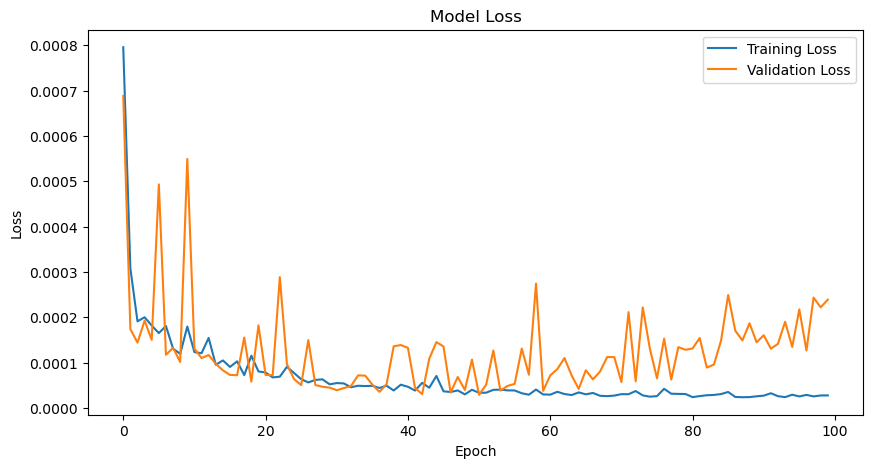

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
test_df = Ticker(ASSET).history(interval='1d', period='max')
test_df

open        high         low  \
symbol date                                                            
AAPL   1980-12-12                   0.128348    0.128906    0.128348   
       1980-12-15                   0.122210    0.122210    0.121652   
       1980-12-16                   0.113281    0.113281    0.112723   
       1980-12-17                   0.115513    0.116071    0.115513   
       1980-12-18                   0.118862    0.119420    0.118862   
...                                      ...         ...         ...   
       2023-09-22                 174.669998  177.080002  174.050003   
       2023-09-25                 174.199997  176.970001  174.149994   
       2023-09-26                 174.820007  175.199997  171.660004   
       2023-09-27                 172.619995  173.039993  169.050003   
       2023-09-28 13:29:32-04:00  169.339996  172.026001  167.619995   

                                       close     volume    adjclose  \
symbol date                                                           
AAPL   1980-12-12                   0.128348  469033600    0.099450   
       1980-12-15                   0.121652  175884800    0.094261   
       1980-12-16                   0.112723  105728000    0.087343   
       1980-12-17                   0.115513   86441600    0.089504   
       1980-12-18                   0.118862   73449600    0.092099   
...                                      ...        ...         ...   
       2023-09-22                 174.789993   56663000  174.789993   
       2023-09-25                 176.080002   46172700  176.080002   
       2023-09-26                 171.960007   64588900  171.960007   
       2023-09-27                 170.429993   66830700  170.429993   
       2023-09-28 13:29:32-04:00  170.929993   35694733  170.929993   

                                  dividends  splits  
symbol date                                          
AAPL   1980-12-12                       0.0     0.0  
       1980-12-15                       0.0     0.0  
       1980-12-16                       0.0     0.0  
       1980-12-17                       0.0     0.0  
       1980-12-18                       0.0     0.0  
...                                     ...     ...  
       2023-09-22                       0.0     0.0  
       2023-09-25                       0.0     0.0  
       2023-09-26                       0.0     0.0  
       2023-09-27                       0.0     0.0  
       2023-09-28 13:29:32-04:00        0.0     0.0  

[10789 rows x 8 columns]

In [38]:
test_df = test_df.reset_index(level='symbol')
test_df

,symbol,open,high,low,close,volume,adjclose,dividends,splits
date,,,,,,,,,
1980-12-12,AAPL,0.128348,0.128906,0.128348,0.128348,469033600,0.099450,0.0,0.0
1980-12-15,AAPL,0.122210,0.122210,0.121652,0.121652,175884800,0.094261,0.0,0.0
1980-12-16,AAPL,0.113281,0.113281,0.112723,0.112723,105728000,0.087343,0.0,0.0
1980-12-17,AAPL,0.115513,0.116071,0.115513,0.115513,86441600,0.089504,0.0,0.0
1980-12-18,AAPL,0.118862,0.119420,0.118862,0.118862,73449600,0.092099,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-09-22,AAPL,174.669998,177.080002,174.050003,174.789993,56663000,174.789993,0.0,0.0
2023-09-25,AAPL,174.199997,176.970001,174.149994,176.080002,46172700,176.080002,0.0,0.0
2023-09-26,AAPL,174.820007,175.199997,171.660004,171.960007,64588900,171.960007,0.0,0.0


In [39]:
test_df.index

Index([               1980-12-12,                1980-12-15,
                      1980-12-16,                1980-12-17,
                      1980-12-18,                1980-12-19,
                      1980-12-22,                1980-12-23,
                      1980-12-24,                1980-12-26,
       ...
                      2023-09-15,                2023-09-18,
                      2023-09-19,                2023-09-20,
                      2023-09-21,                2023-09-22,
                      2023-09-25,                2023-09-26,
                      2023-09-27, 2023-09-28 13:29:32-04:00],
      dtype='object', name='date', length=10789)

In [23]:
real_price = test_df['close'].values.reshape(-1, 1)

In [24]:
data_total = pd.concat((stck_data['close'], test_df['close']), axis=0)

In [25]:
inpts = data_total[len(data_total) - len(test_df) - 60:].values
inpts = inpts.reshape(-1, 1)
inpts = scaler.transform(inpts)
X_test = []
for i in range(60, len(inpts)):
    X_test.append(inpts[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2023-09-28 19:22:21.705414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 19:22:21.816997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 19:22:21.886421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/338 [..............................] - ETA: 3s  

2023-09-28 19:22:21.933646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-28 19:22:21.983278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 5s 11ms/step


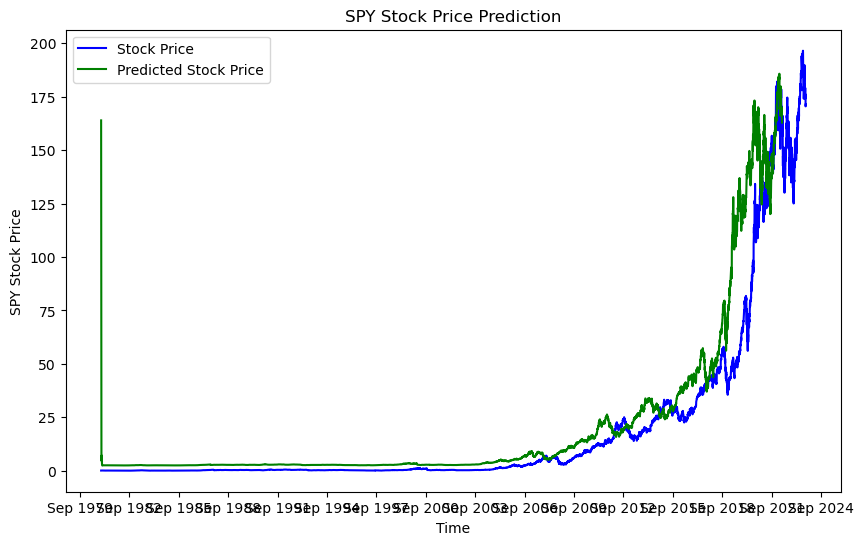

In [51]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='1980-12-12', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, real_price, color='blue', label='Stock Price')
plt.plot(date_range, predicted_stock_price, color='green', label='Predicted Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=36))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()